# Cumulative Regret Leaderboard

In [1]:
#!pip install --upgrade PyXAB

In [2]:
from PyXAB.synthetic_obj import *
from PyXAB.algos import *

from PyXAB.partition.BinaryPartition import BinaryPartition

import PyXAB
import matplotlib.pyplot as plt
import numpy as np

Define the main function

In [3]:

def main(algo_list, target, domain, partition, noise=0.1, rounds=1000):
    algo_dictionary = {
        "T-HOO": HOO.T_HOO(rounds=rounds, domain=domain, partition=partition),
        "HCT": HCT.HCT(domain=domain, partition=partition),
        "VHCT": VHCT.VHCT(domain=domain, partition=partition),
        "POO": POO.POO(
            rounds=rounds, domain=domain, partition=partition, algo=HOO.T_HOO
        ),
        "PCT": PCT.PCT(rounds=rounds, domain=domain, partition=partition),
        "VPCT": VPCT.VPCT(rounds=rounds, domain=domain, partition=partition),
    }

    for name in algo_list:
        print(name, ": training")
        algo = algo_dictionary[name]
        regret_list = []
        regret = 0
        for t in range(1, rounds + 1):
            point = algo.pull(t)
            reward = target.f(point) + np.random.uniform(-noise, noise)
            algo.receive_reward(t, reward)
            inst_regret = target.fmax - target.f(point)
            regret += inst_regret
            regret_list.append(regret)

    return np.array(regret_list)

Define the plot function

In [4]:

def compare_regret_withsd(ax, dictionary):
    regret = dictionary["regret"]
    colors = dictionary["colors"]
    labels = dictionary["labels"]

    for i in range(len(regret)):
        regret_array = regret[i]
        x = np.arange((regret_array.shape[1])) + 1
        mean = np.mean(regret_array, axis=0)
        std = np.std(regret_array, axis=0)
        ax.plot(x, mean, linewidth=2, color=colors[i], label=labels[i], alpha=0.9)
        l = ax.fill_between(x, mean + 1 * std, mean - 1 * std, color=colors[i], alpha=0.3)
    
    ax.set_xlabel(dictionary['target'])
    return l

Run the algorithms on the objectives

objective:  Garland
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
objective:  DoubleSine
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : traini

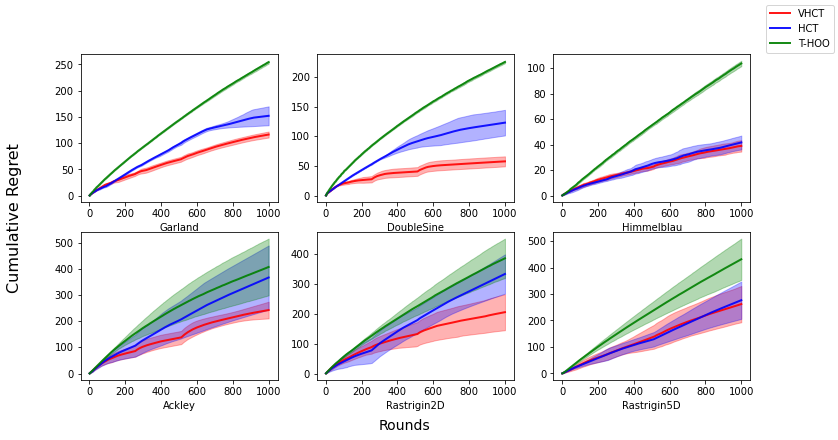

In [5]:

objectives = {"Garland": Garland.Garland(),
              "DoubleSine": DoubleSine.DoubleSine(),
              "Himmelblau": Himmelblau.Himmelblau_Normalized(),
              "Ackley": Ackley.Ackley_Normalized(),
              "Rastrigin2D": Rastrigin.Rastrigin_Normalized(),
              "Rastrigin5D": Rastrigin.Rastrigin_Normalized()
             }

domains =    {"Garland": [[0, 1]],
              "DoubleSine":  [[0, 1]],
              "Himmelblau": [[-5, 5], [-5, 5]],
              "Ackley":  [[-1, 1], [-1, 1]],
              "Rastrigin2D": [[-1, 1], [-1, 1]],
              "Rastrigin5D": [[-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1]]
             }

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

lists = []
for name in objectives.keys():
    
    target = objectives[name]
    domain = domains[name]
    partition = BinaryPartition
    rounds = 1000
    noise = 0.1

    trials = 10
    print("objective: ", name)
    regret_array_HOO = np.array(
        [main(["T-HOO"], target, domain, partition, noise, rounds) for _ in range(trials)]
    )
    regret_array_HCT = np.array(
        [main(["HCT"], target, domain, partition, noise, rounds) for _ in range(trials)]
    )
    regret_array_VHCT = np.array(
        [main(["VHCT"], target, domain, partition, noise, rounds) for _ in range(trials)]
    )
    

    regret_dic = {
        "target": name,
        "regret": [
            regret_array_VHCT,
            regret_array_HCT,
            regret_array_HOO,
        ],
        "labels": ["VHCT", "HCT", "T-HOO", ],
        "colors": ["red", "blue", "green", ],
    }

    lists.append(compare_regret_withsd(axes[len(lists)//3, len(lists)%3], regret_dic))

lines_labels = [axes[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)


fig.text(0.5, 0.01, 'Rounds', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Cumulative Regret', va='center', rotation='vertical', fontsize=16)
plt.show()